## About

This plot is a [choropleth map](/choropleth-map). It show the CO2 emissions per capita in 2021 for each country.

The chart was made by [Joseph Barbier](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![choropleth map with custom legend](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/evolution-europe-map-co2.gif)


## Libraries

First, you need to install the following librairies:

- [matplotlib](/matplotlib) is used for creating the chart and add customization features
- [pandas](/pandas) and `geopandas` are used to put the data into a dataframe and manipulate geographical data
- [drawarrow](/drawarrow) for the arrows
- [pyfonts](/pyfonts) for the fonts
- `geopandas`: for the geographical data
- `highlight_text`: to add beautiful annotations to the chart

And that's it!


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from matplotlib.font_manager import FontProperties
from drawarrow import fig_arrow
from pyfonts import load_font

from highlight_text import fig_text, ax_text

## Dataset

**Creating a [choropleth map](/choropleth-map)** necessitates a **dataset with geographical information**. For this example, we need to **load the world map** from the [Gallery's repo](https://github.com/holtzy/The-Python-Graph-Gallery).

Next, we should **load the dataset containing the values** we want to represent on the map, such as **CO2 per capita by country**. This dataset is also accessible in the [Gallery's repo](https://github.com/holtzy/The-Python-Graph-Gallery).


In [2]:
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/europe.geojson"
world = gpd.read_file(url)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
1,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."


<br>

Now we merge this dataset with the world map with a `merge` function. This function will match the country names in the two datasets and add the CO2 values to the world map dataframe.


In [3]:
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/co2PerCapita.csv"
df = pd.read_csv(url)

# merge data
data = world.merge(df, how='left', left_on='name', right_on='Country')

# filter to keep only specific countries
data = data[data['continent'] == 'Europe']
data = data[~data['name'].isin(['Russia', 'Iceland'])]
data = data[data['Year'] == 2021]
data = data[['name', 'Total', 'geometry']]
data = data.dropna()
data.head()

,name,Total,geometry
543,Norway,7.573273,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
815,France,4.741312,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
1087,Sweden,3.424918,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
1359,Belarus,6.222741,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
1631,Ukraine,4.637058,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."


## Background map

Thanks to the `geopandas` library, we can easily add a **background map** to our plot by simply calling the `plot()` function on our **geo dataframe**.

With just a few lines of code, we can create a **synthetic map** that displays a **European map**.


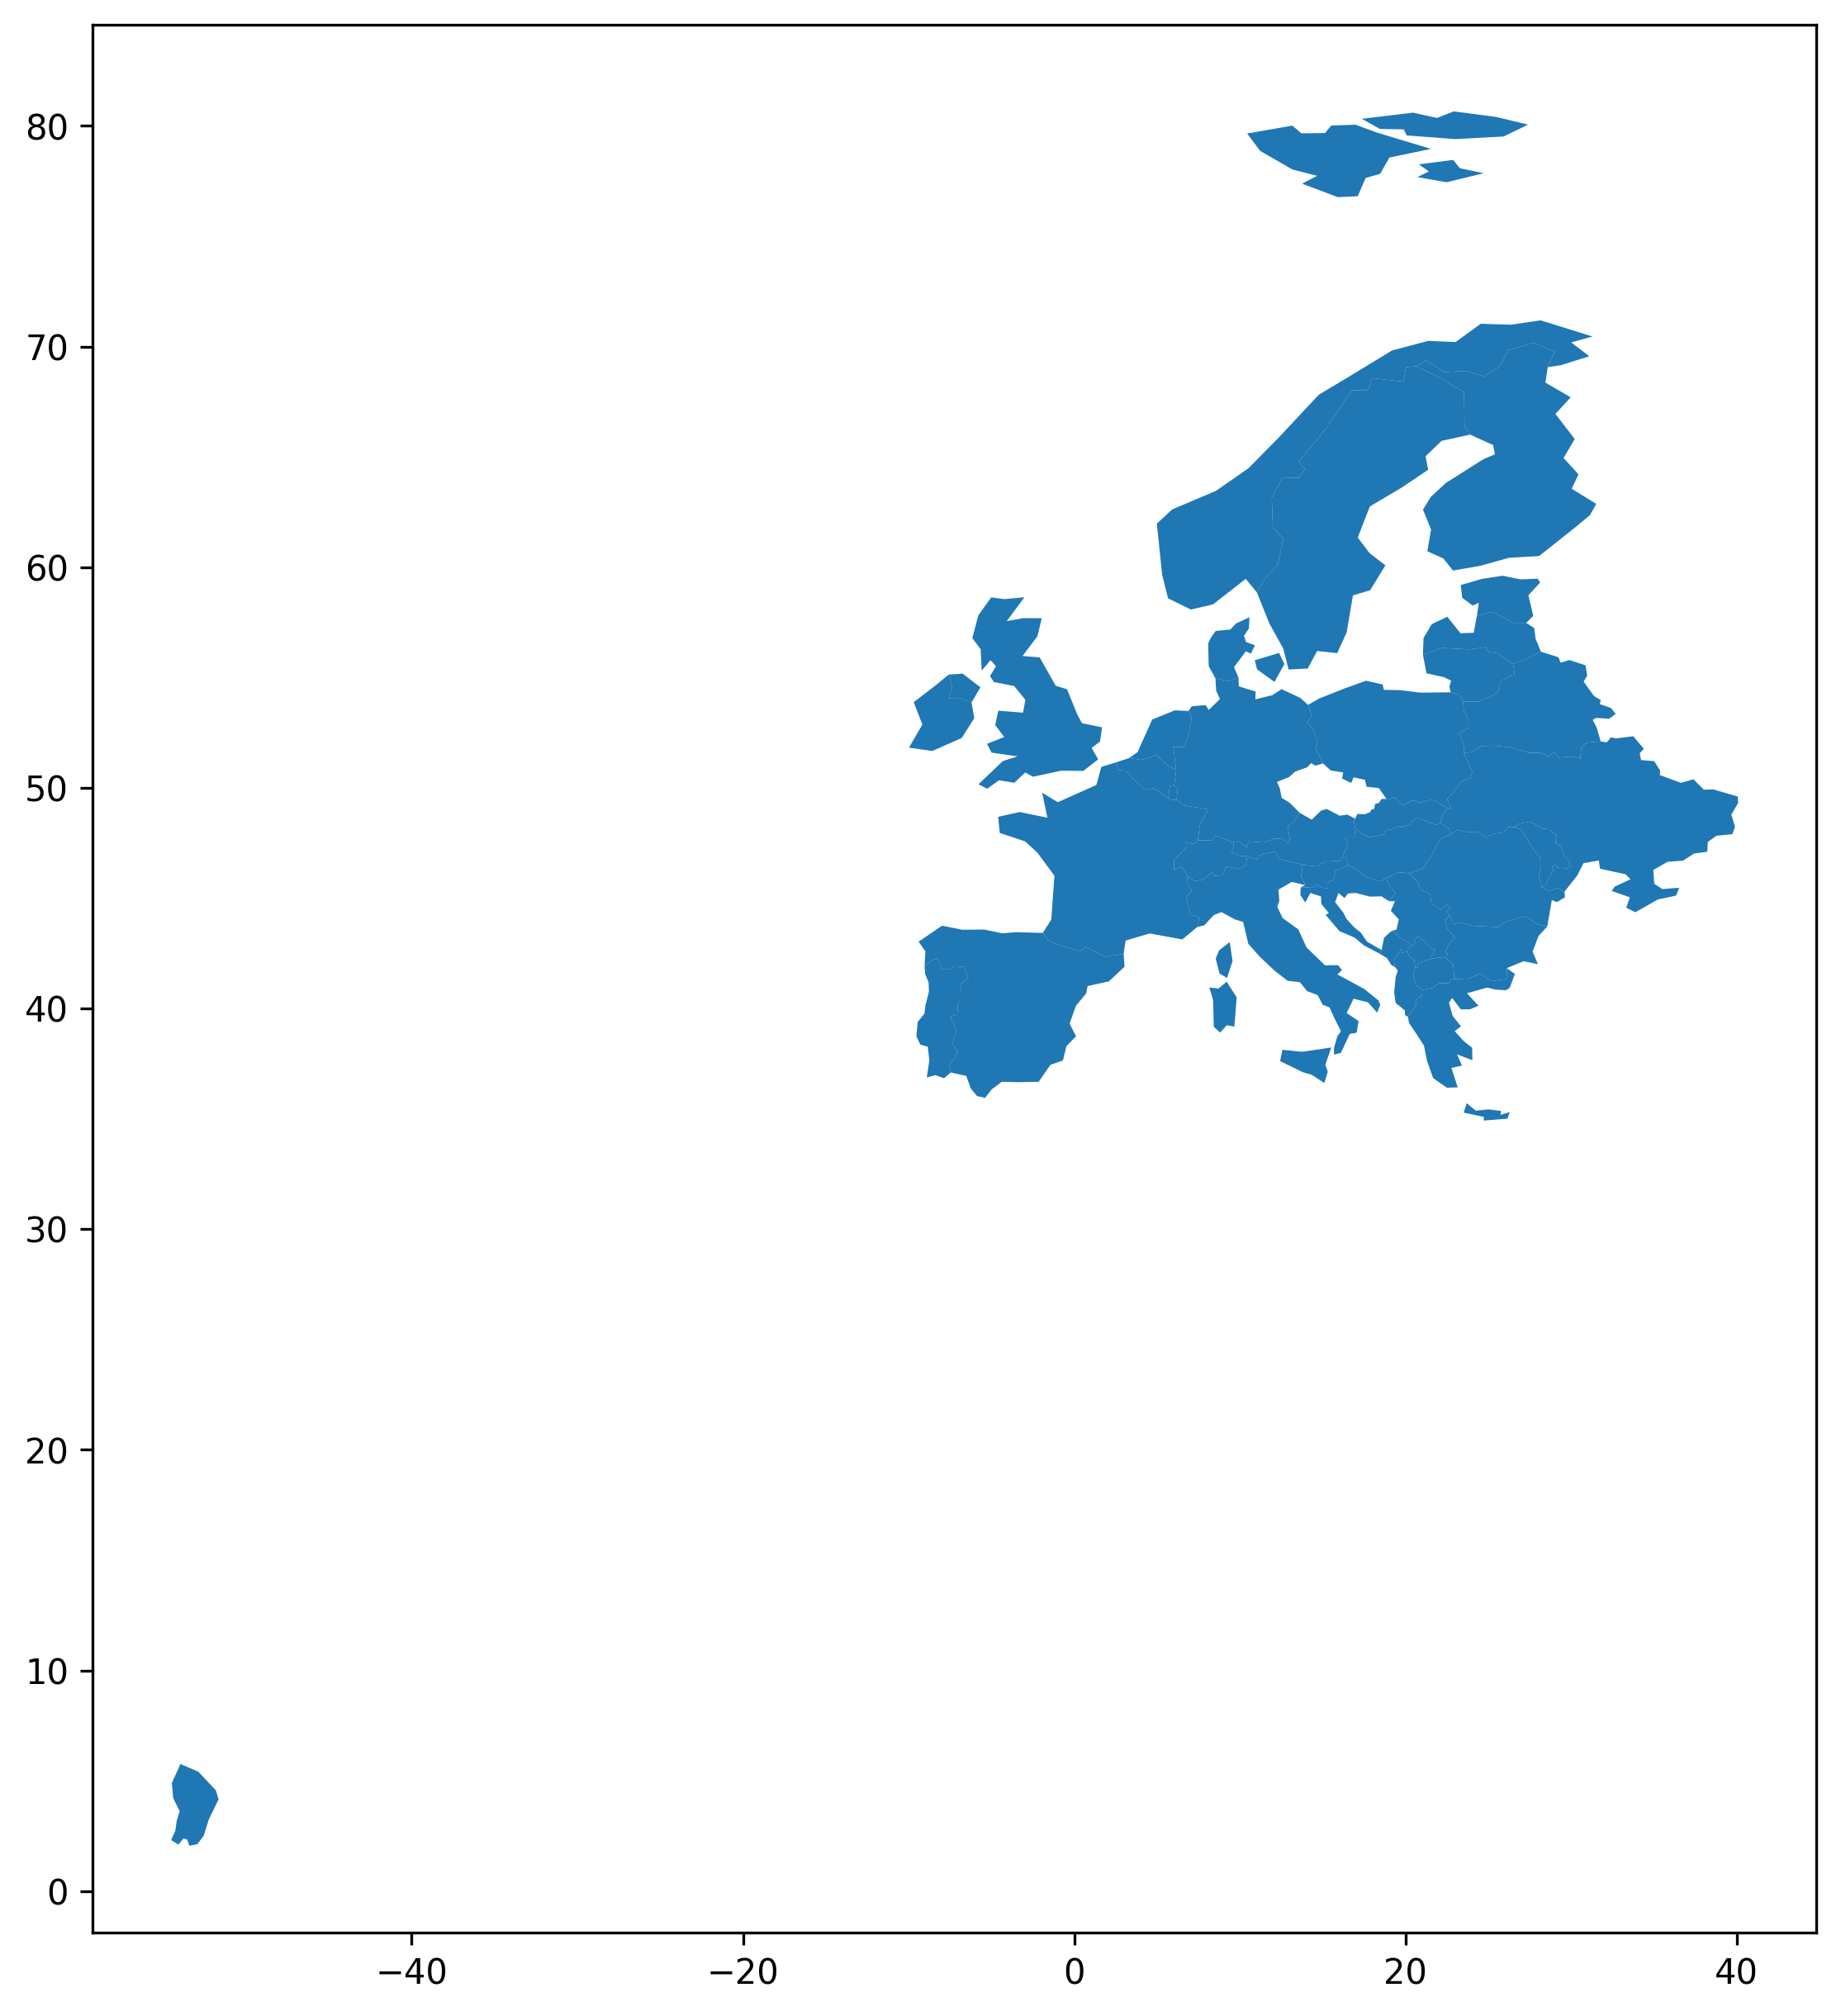

In [4]:
# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax)
plt.show()

## Custom axis

The next step is to **adjust the plot's ranges** (latitude and longitude) using the `set_xlim()` and `set_ylim()` functions on the axis object.

We also **remove the spines** around the map since they are not particularly useful in this context.


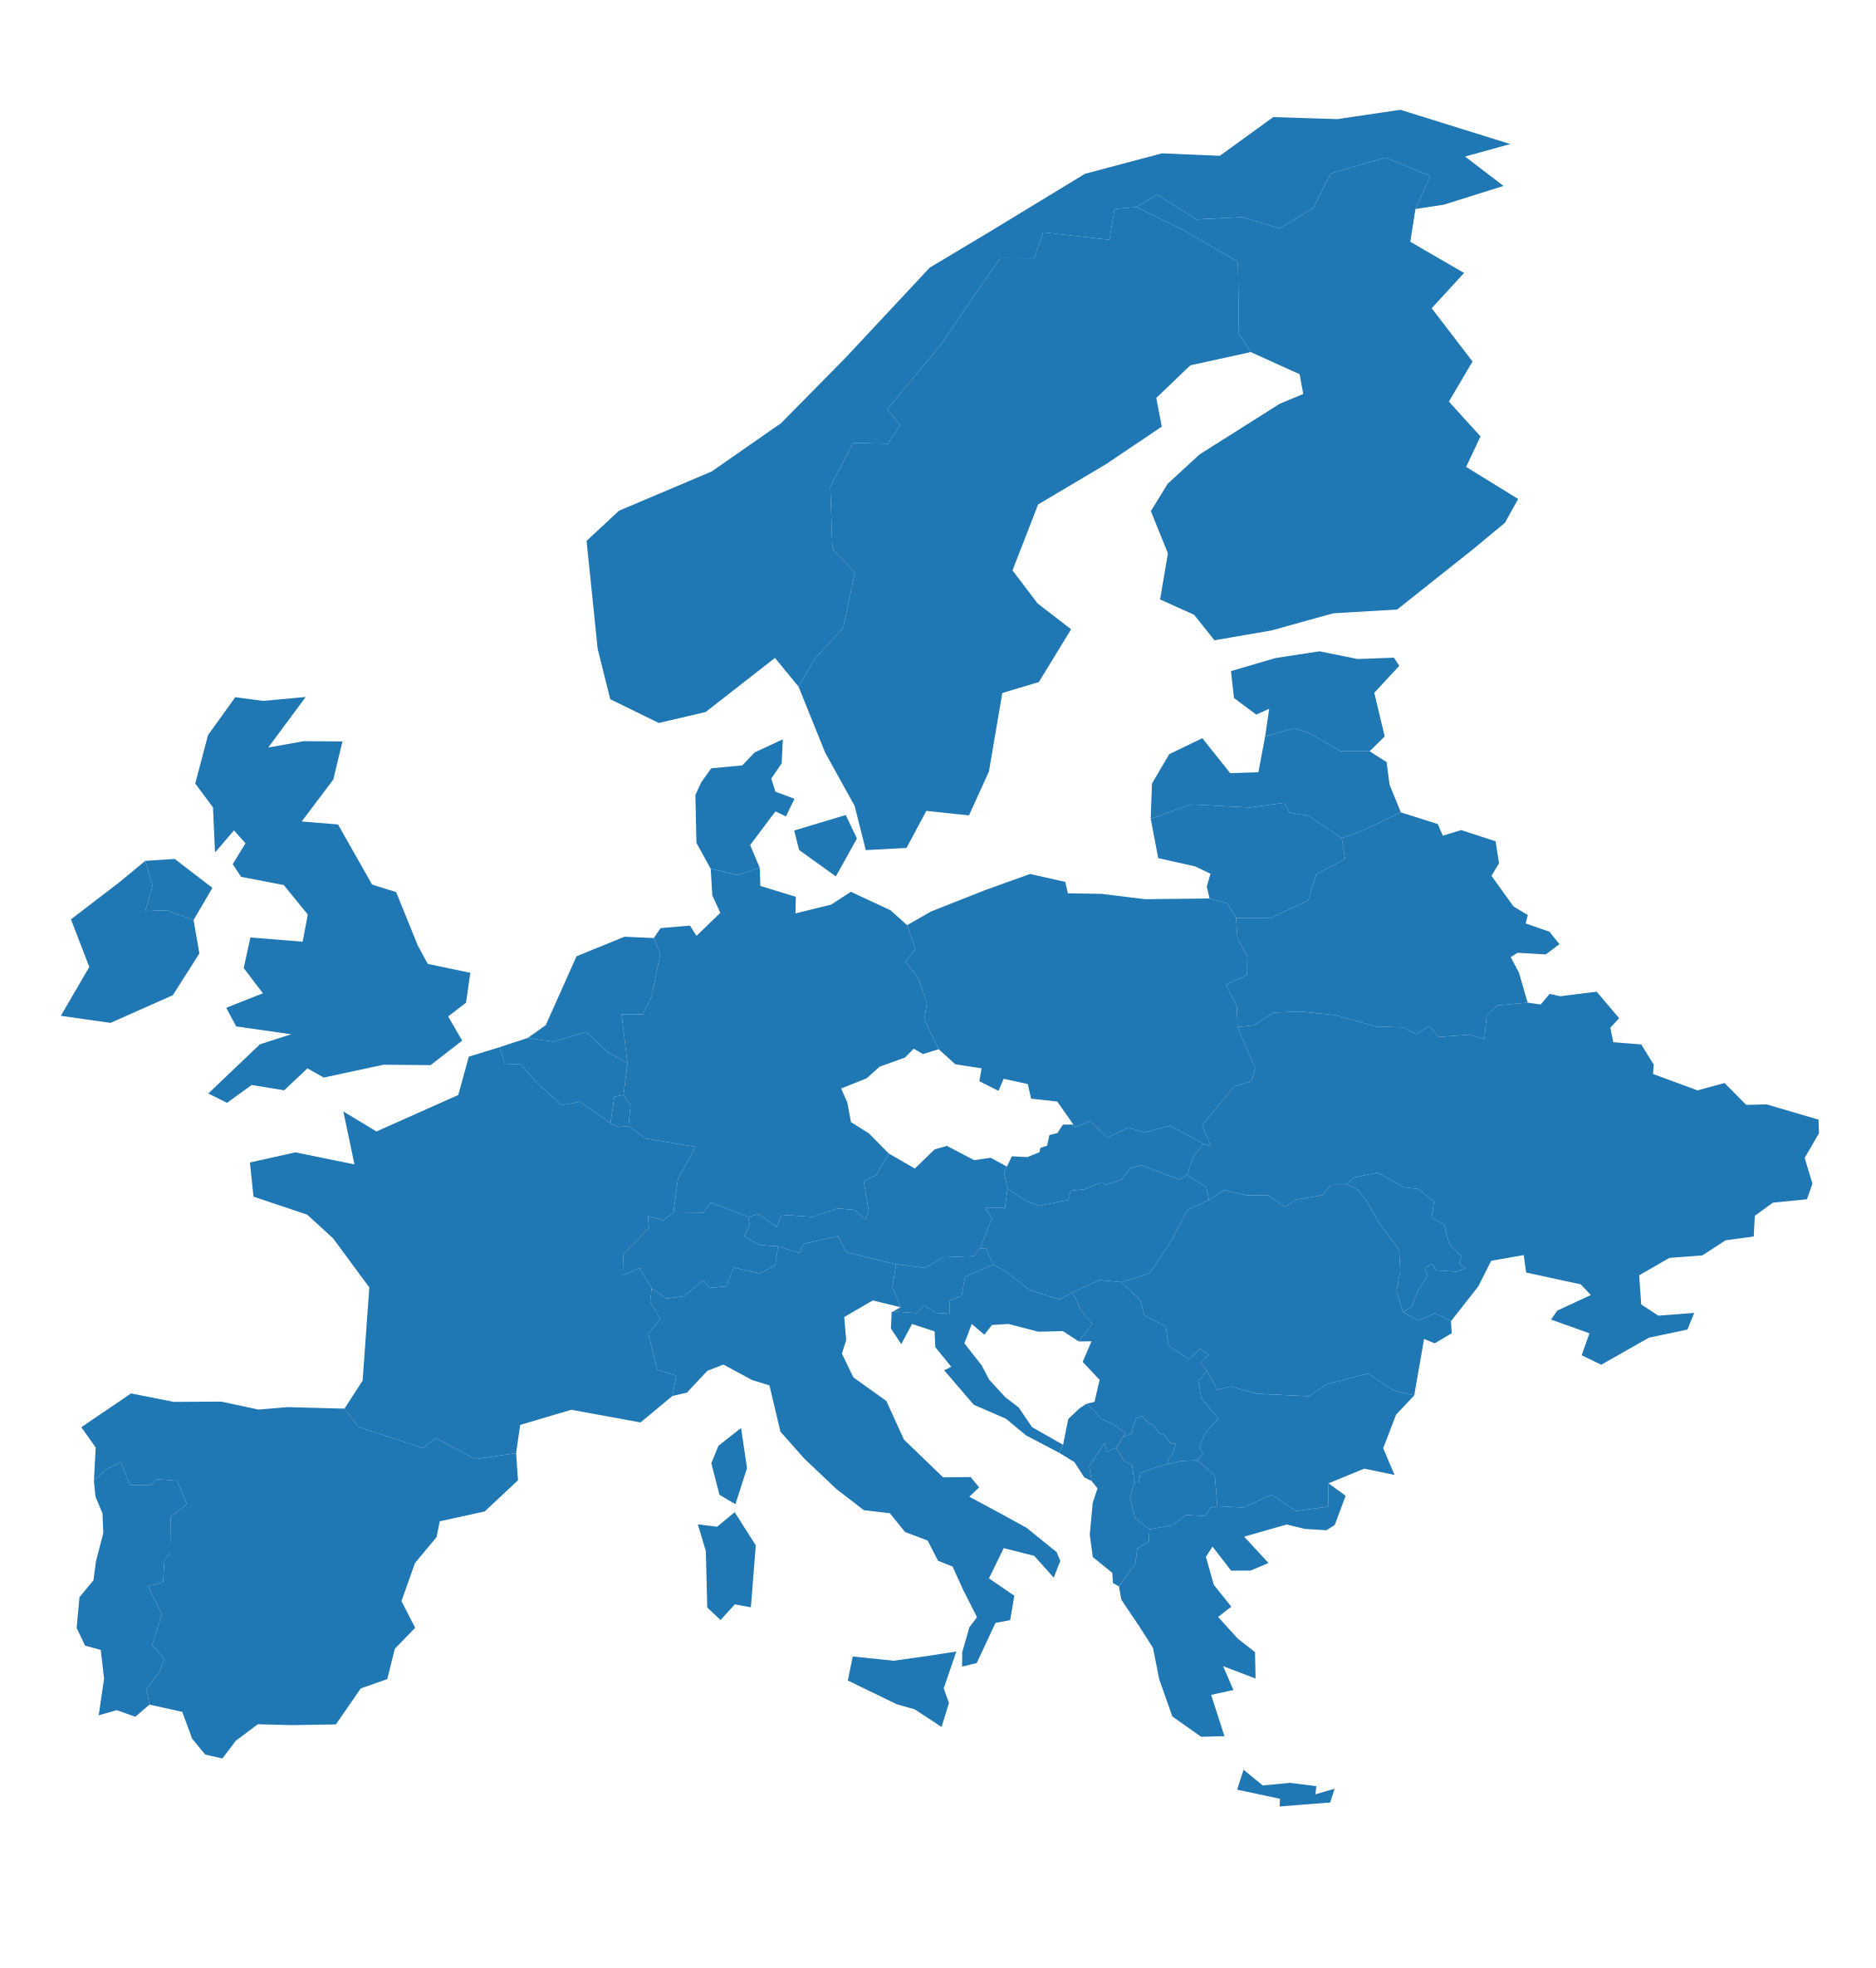

In [5]:
# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

plt.show()

## Choropleth map

A [choropleth map](/choropleth-map) is distinct from a background map because it employs **color gradients** to depict data, with each country shaded according to its data value.

We initiate by loading a colormap via the `load_cmap()` function from the [pypalettes library](/color-palette-finder), subsequently integrating this colormap into the plot by including `cmap=cmap` in the `plot()` function.

To enhance readability, we also define the `edgecolor` and `linewidth` of the countries.


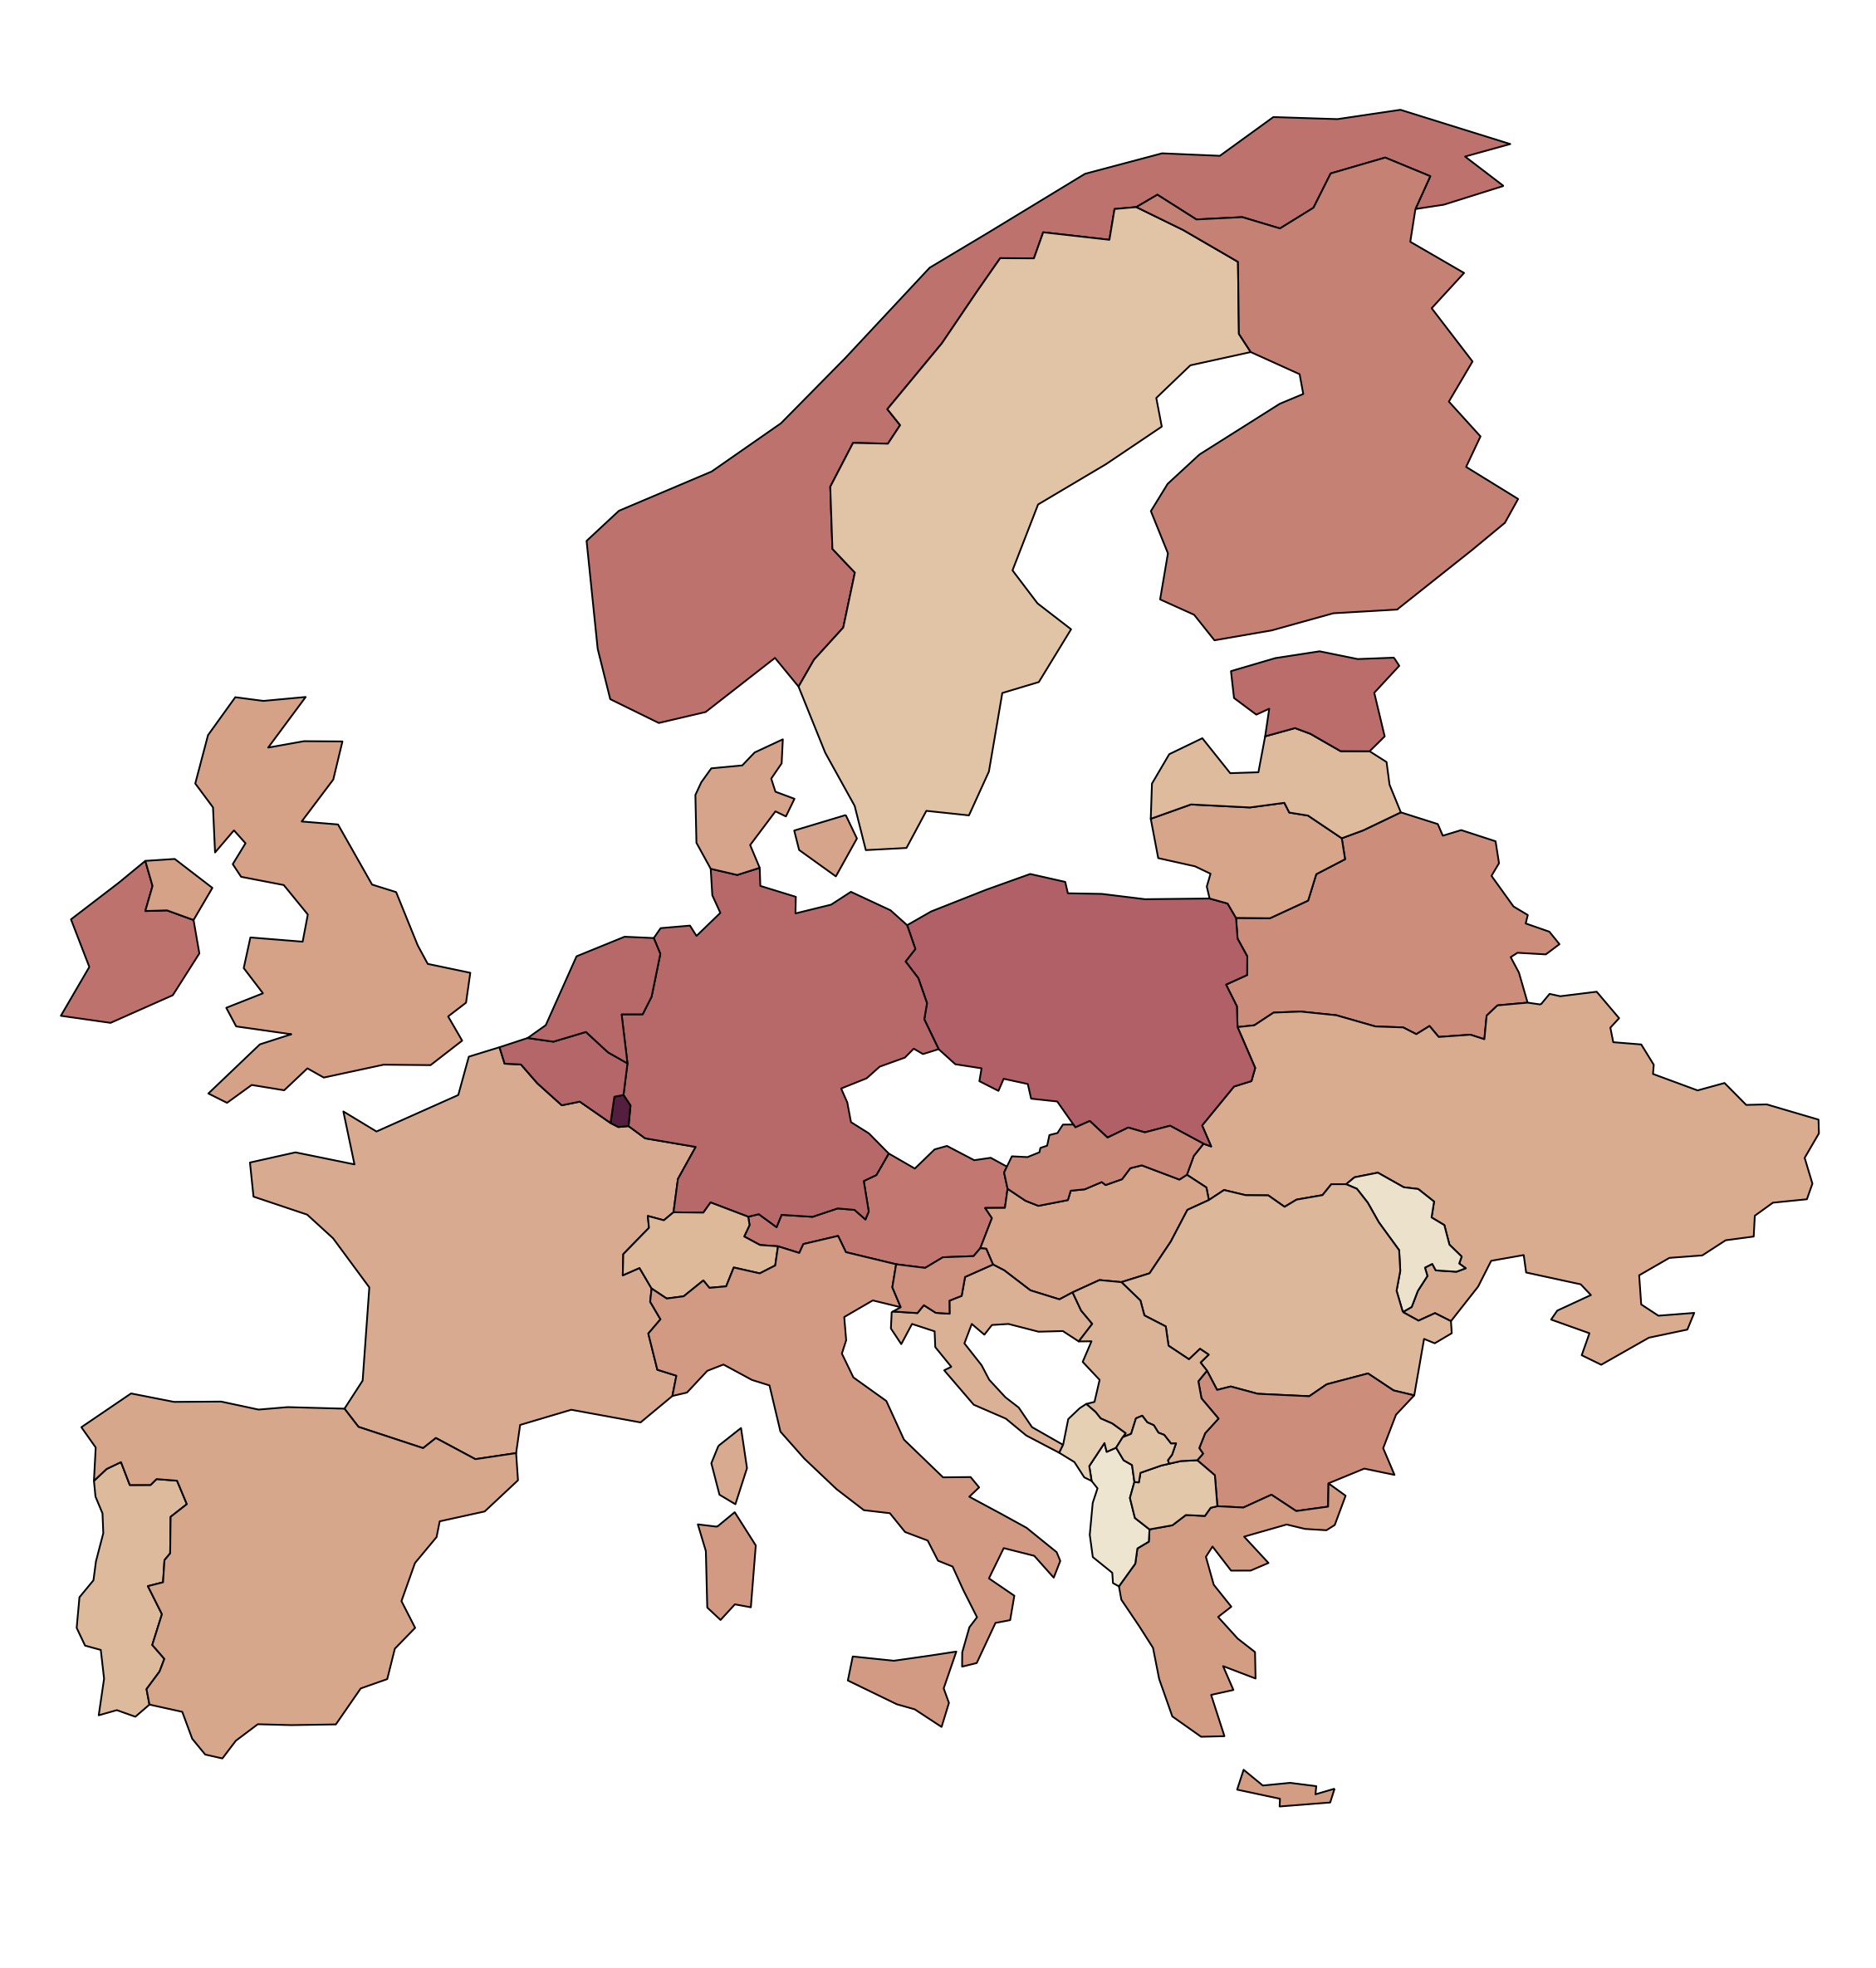

In [6]:
# load colormap
cmap = load_cmap('BrwnYl', cmap_type='continuous')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

plt.show()

## Centroids and annotations

The easiest way to find the center of each country is to use the `centroid` attribute of the `geometry` column in the `geo dataframe`. These coordinates can then be used to add annotations to the map.

Since the default font isn't very attractive, we load **two other fonts**: one for the **title** and one for the **annotations**. We can then use the `ax_text()` function from the [`highlight_text` library](/advanced-custom-annotations-matplotlib) to add annotations to the map, and [pyfonts](/pyfonts) to load the fonts from Github.

Just before adding the annotations, we define an **adjustment dictionary** to help us improve the approximate position of the annotations. This is necessary because centroids aren't always ideally positioned for annotations, especially in countries with outlying islands.


In [7]:
adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Finland': (0, -2),
    'Belarus': (0, -0.4),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'United Kingdom': (1, -1.5),
    'Norway': (-4, -5.5),
}

# Example
print(adjustments['France'])

(10, 3)


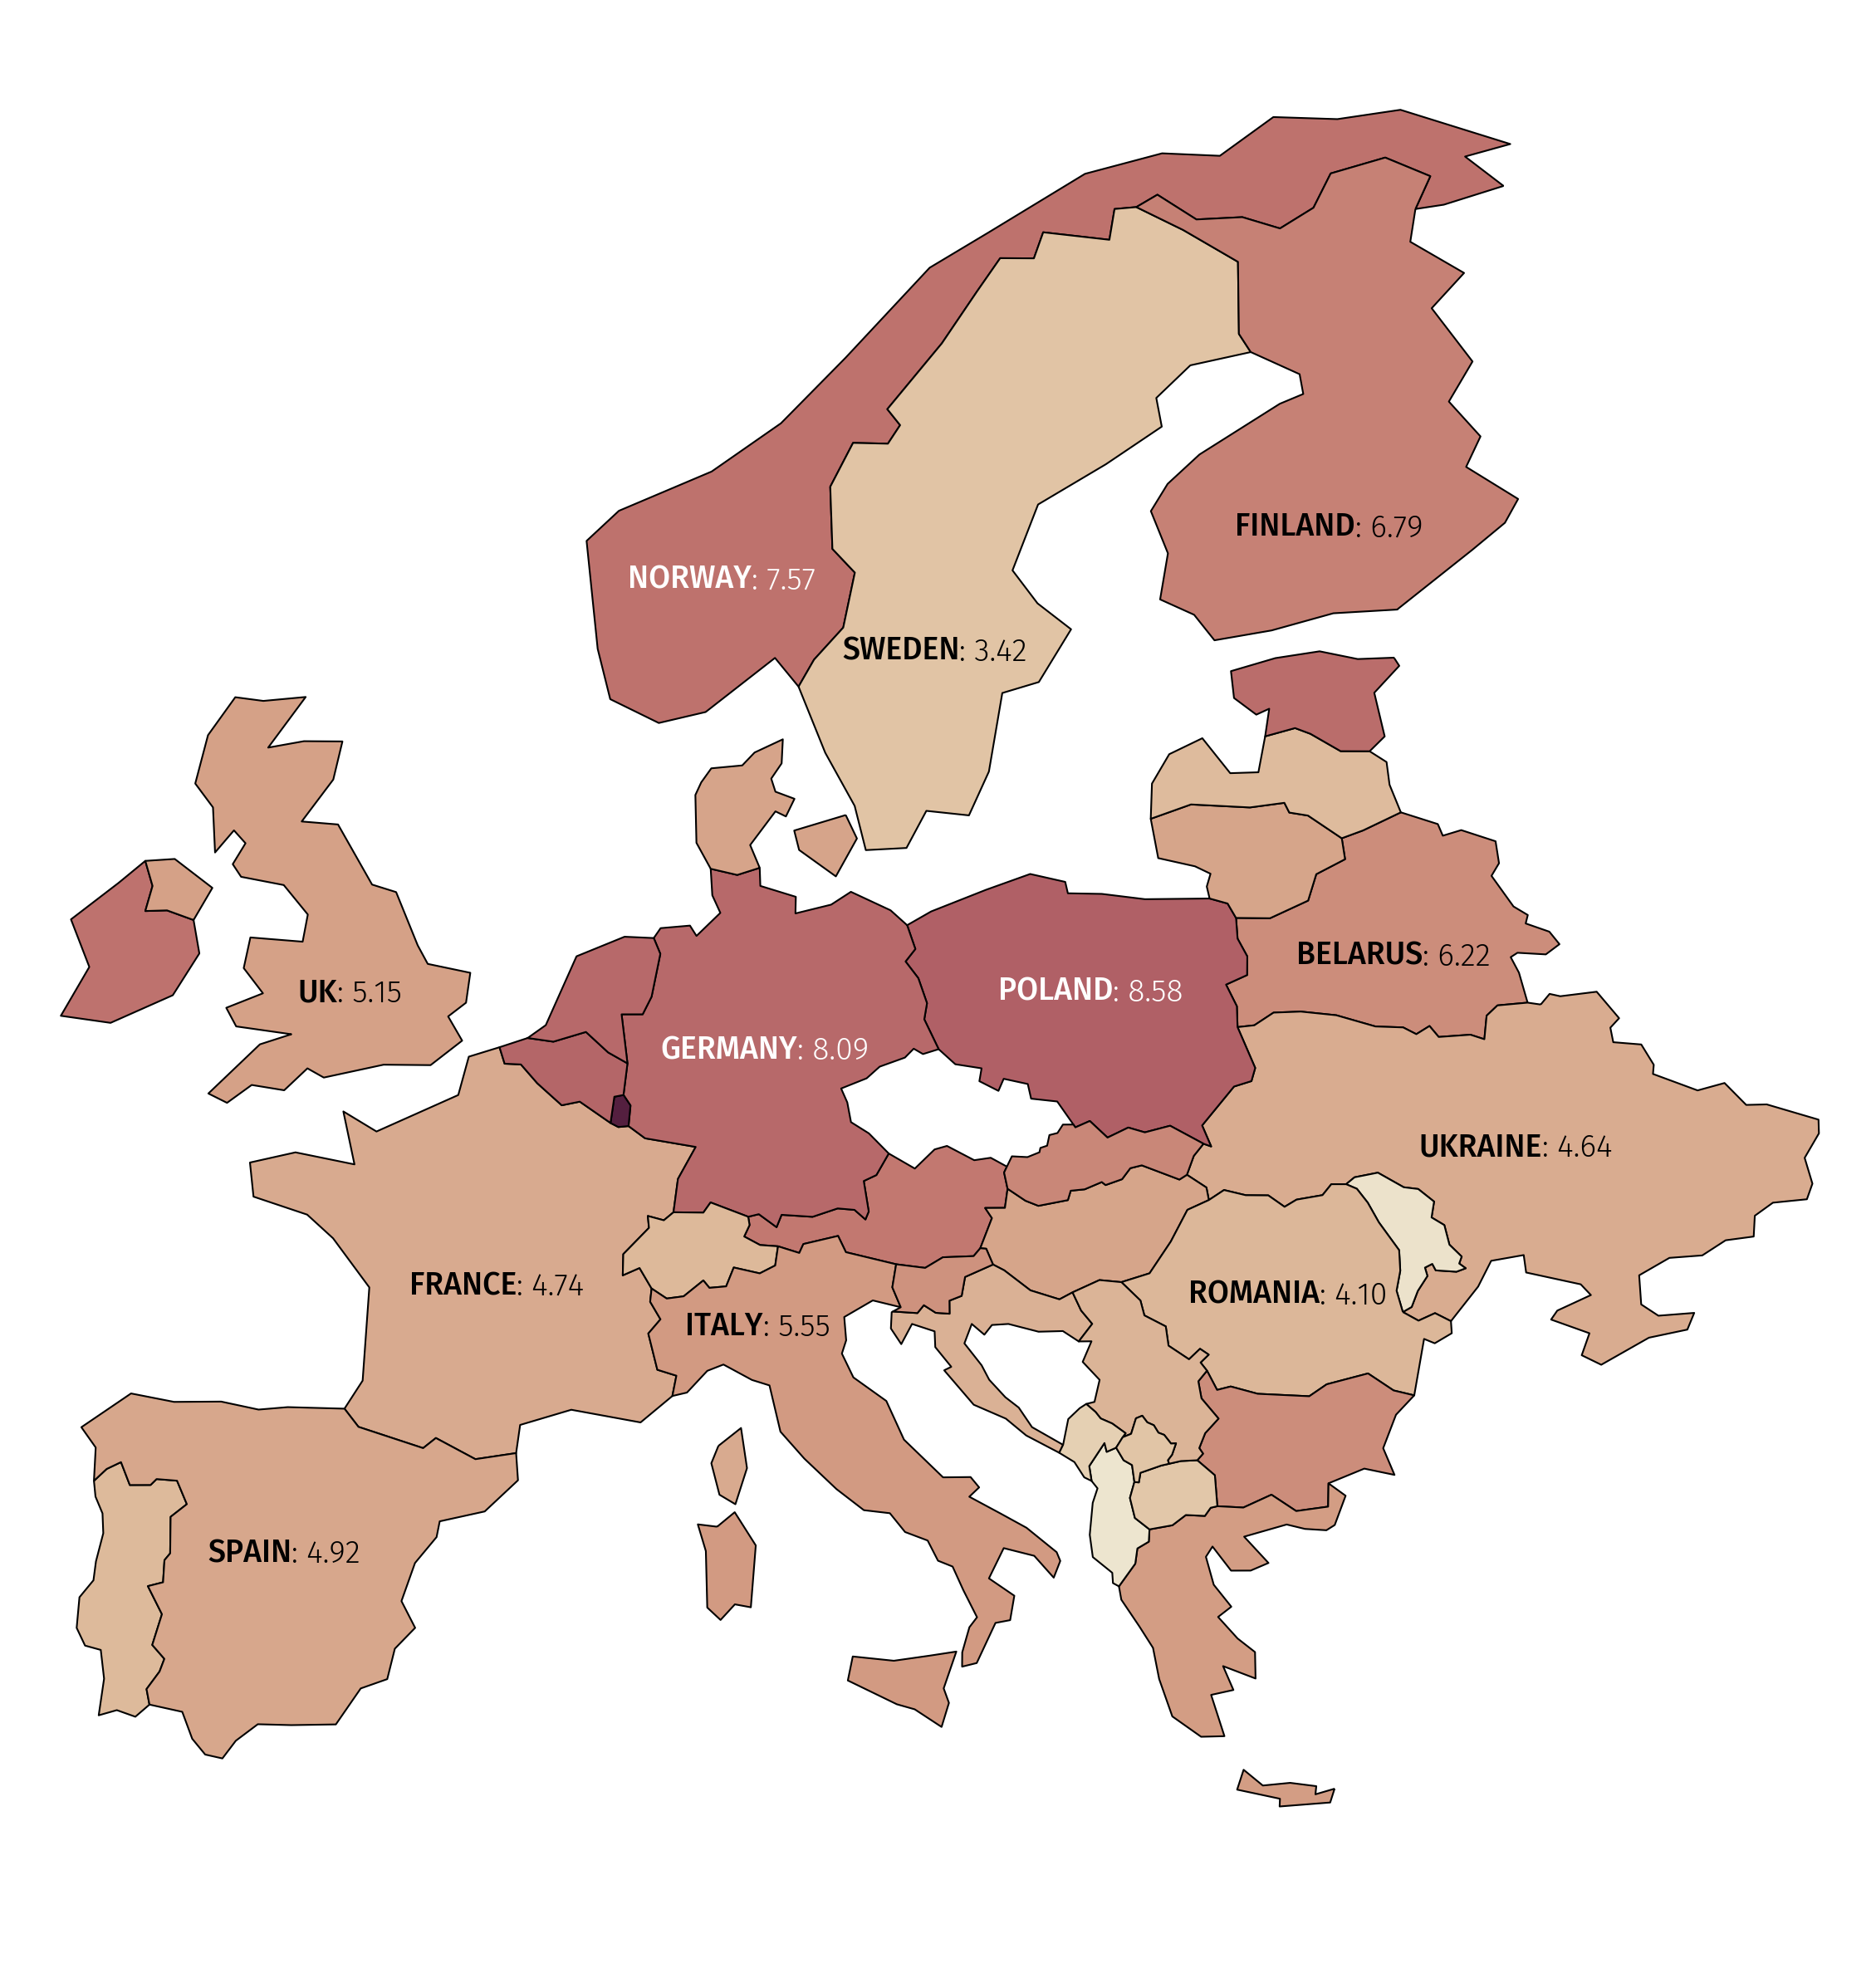

In [8]:
# load colormap and other colors
cmap = load_cmap('BrwnYl', cmap_type='continuous')
background_color = 'white'
text_color = 'black'

# load the fonts
font = load_font(
   'https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2018)ByDhamraType/ttf/BebasNeue-Regular.ttf?raw=true'
)
other_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Light.ttf?raw=true'
)
other_bold_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Medium.ttf?raw=true'
)

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# compute the centroid of each country
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

# define which countries to annotate
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine', 'Spain', 'Germany',
   'Sweden', 'United Kingdom', 'Belarus', 'Norway'
]

# annotate each country
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

plt.show()

## Add title and Luxembourg

Since **Luxembourg** is a **small country**, we **annotate it outside** of the **map** and use an **arrow** to explicitly show its **position**. We use the `ax_text()` function from the `highlight_text` **library** to add the **annotation**.

The **arrow** is added using the [drawarrow](/drawarrow) library and its `fig_arrow` function.


To ensure the title is perfectly aligned with the source below, simply specify **`ha='center'`** in the **`ax_text()`** function. This guarantees that, regardless of the title's size, it will always be centered.

In other words, by using the same **`x`** value for both the title and the source, and setting **`ha='center'`**, the title will always be centered with the source.


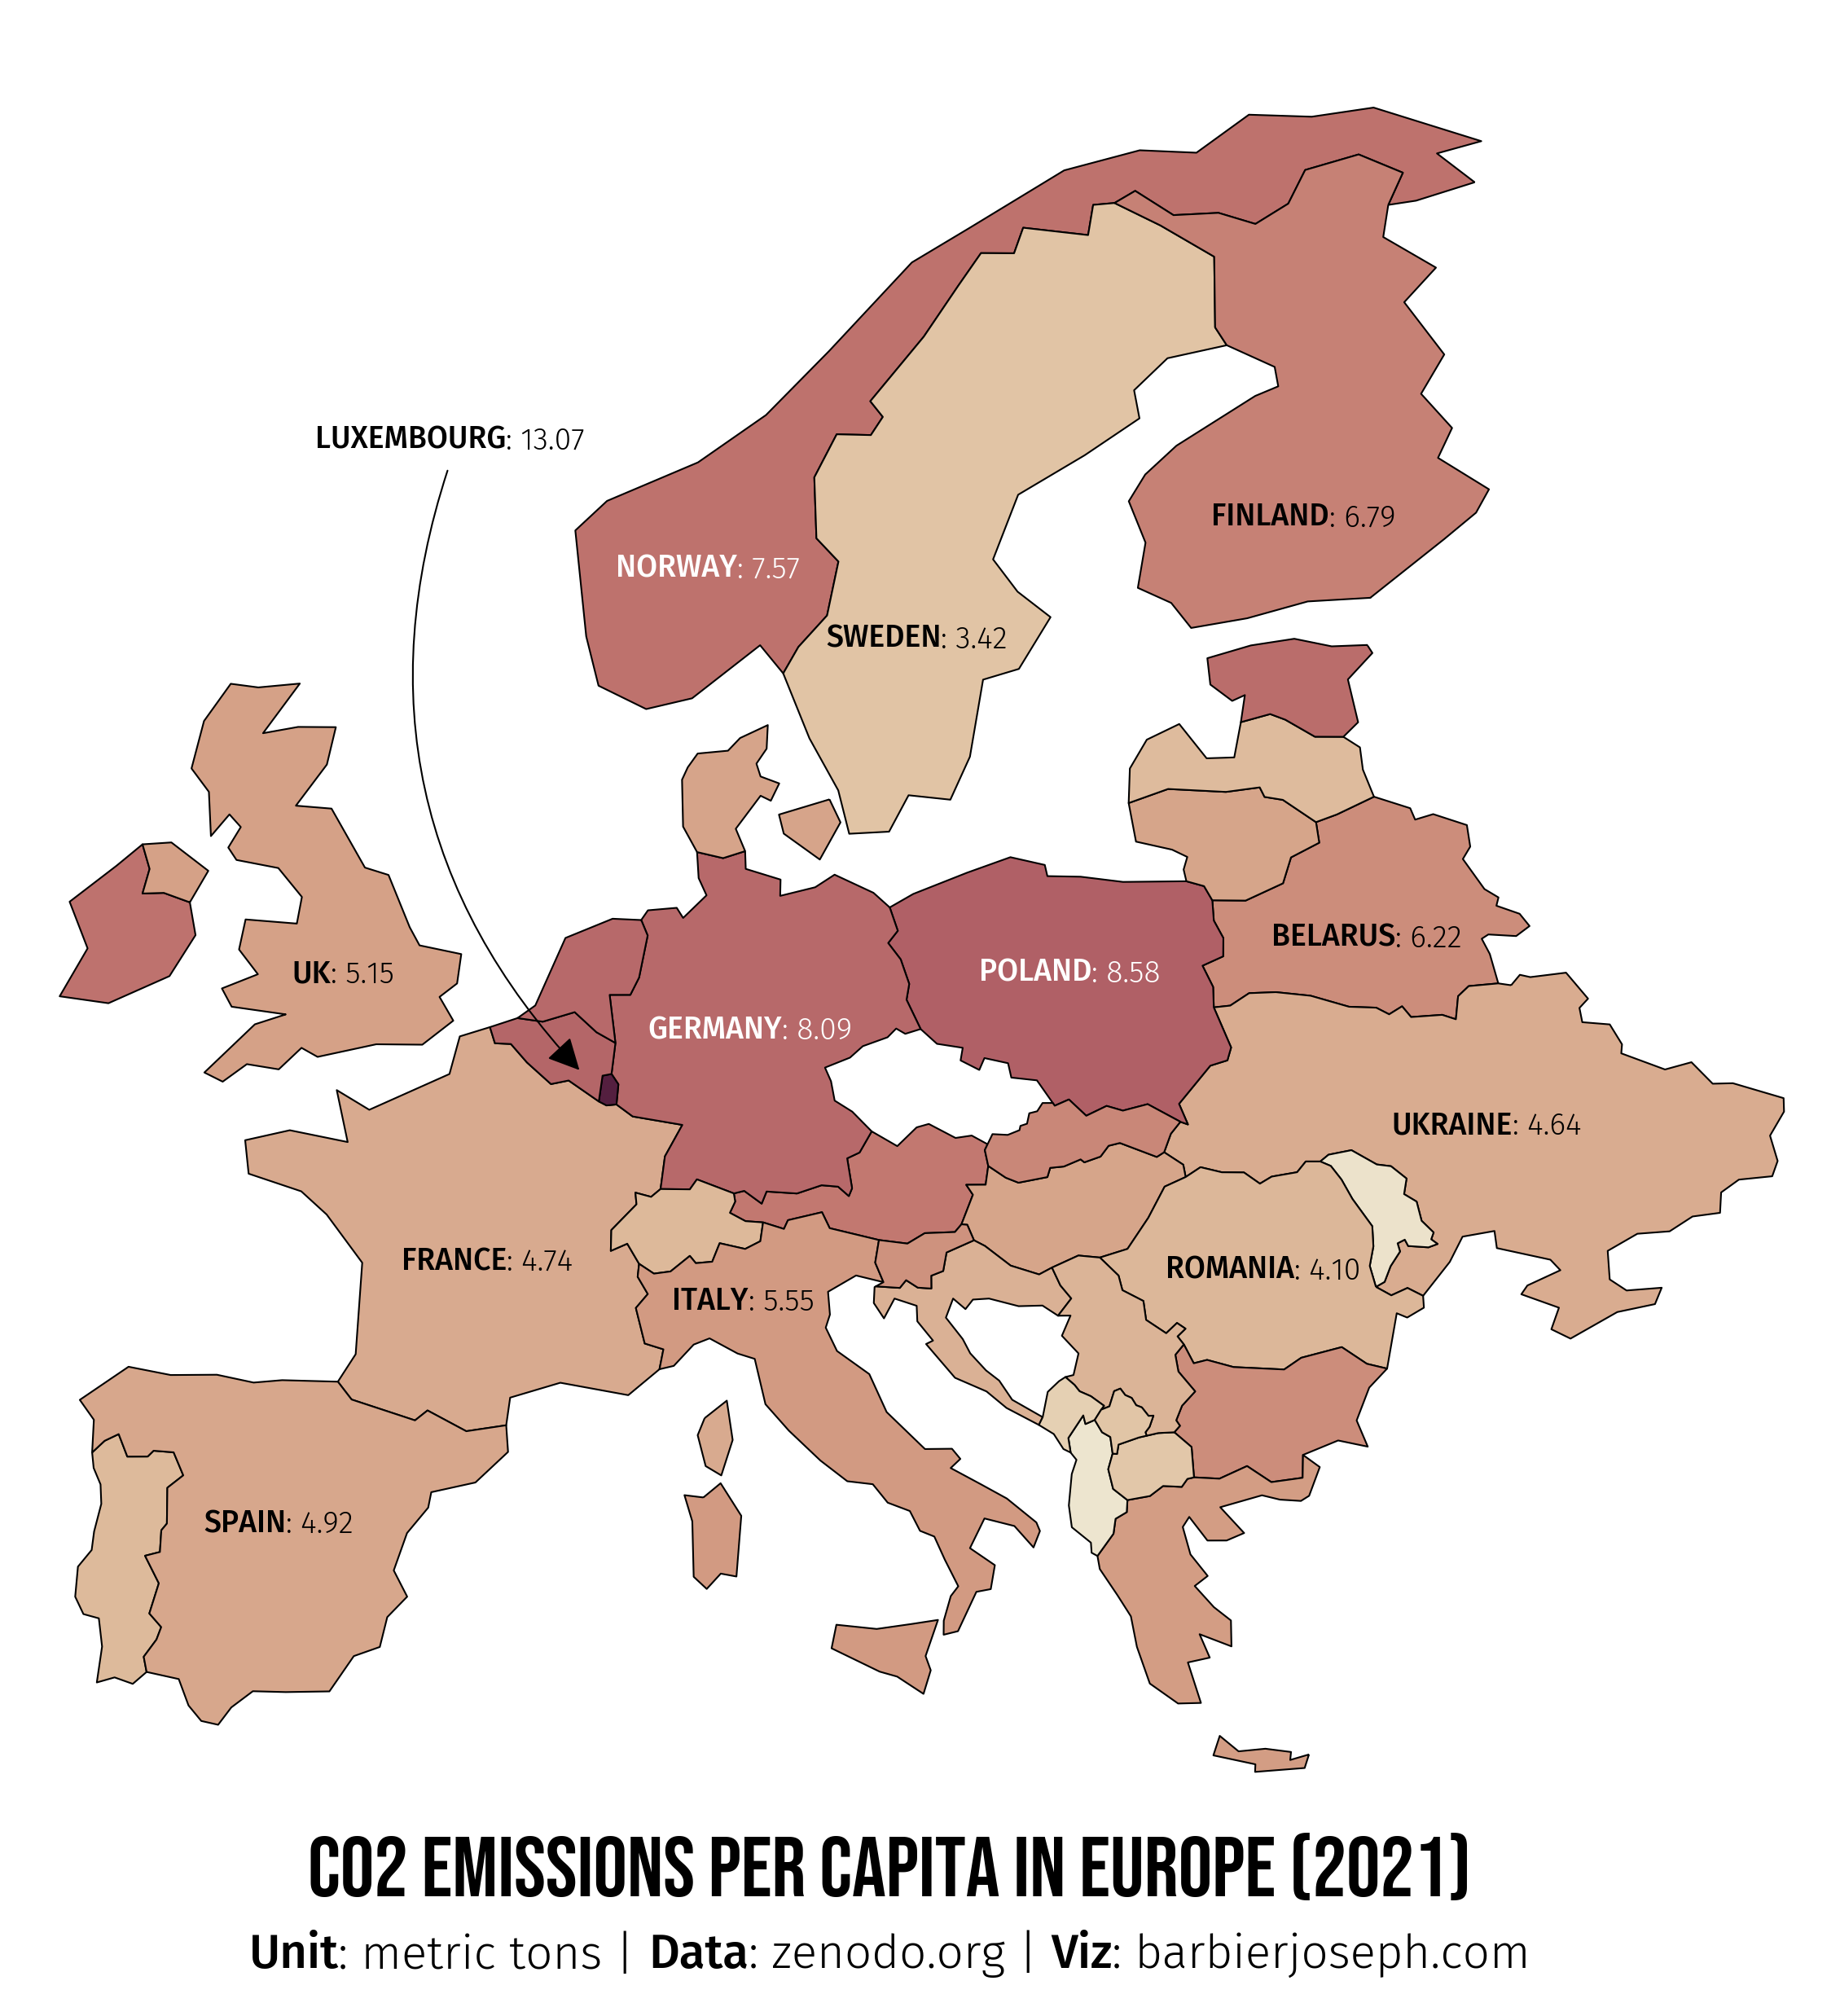

In [9]:
adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Finland': (0, -2),
    'Belarus': (0, -0.4),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'United Kingdom': (1, -1.5),
    'Norway': (-4, -5.5),
}

# load colormap and other colors
cmap = load_cmap('BrwnYl', cmap_type='continuous')
background_color = 'white'
text_color = 'black'

# load the fonts
font = load_font(
   'https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2018)ByDhamraType/ttf/BebasNeue-Regular.ttf?raw=true'
)
other_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Light.ttf?raw=true'
)
other_bold_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Medium.ttf?raw=true'
)

# arrow properties
arrow_props = dict(width=0.5, head_width=4, head_length=8, color='black')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# compute the centroid of each country
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

# define which countries to annotate
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine', 'Spain', 'Germany',
   'Sweden', 'United Kingdom', 'Belarus', 'Norway'
]

# annotate each country
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

# title
fig_text(
   s="CO2 emissions per capita in Europe (2021)", x=0.5, y=0.14,
   color=text_color, fontsize=25, font=font, ha='center', va='top', ax=ax
)

# subtitle
fig_text(
   s="<Unit>: metric tons | <Data>: zenodo.org | <Viz>: barbierjoseph.com", x=0.5, y=0.1,
   color=text_color, fontsize=14, font=other_font, ha='center', va='top', ax=ax,
   highlight_textprops=[{'font': other_bold_font}, {'font': other_bold_font}, {'font': other_bold_font}]
)

# arrows for the Luxembourg
luxembourg_values = data.loc[data['name'] == 'Luxembourg', 'Total'].values[0]
fig_arrow(tail_position=(0.32, 0.7), head_position=(0.375, 0.45), radius=0.3, **arrow_props)
fig_text(
   s=f"<LUXEMBOURG>: {luxembourg_values:.2f}", x=0.32, y=0.71, highlight_textprops=[{'font': other_bold_font}],
   color=text_color, fontsize=9, font=other_font, ha='center', va='center', fig=fig
)

plt.show()

## Final Chart with Legend

Creating the legend for this chart involves some straightforward steps:

- **Define** `value_ranges` as a list storing the legend values: `[1, 3, 5, 7, 9, 11, 13, 15]`.
- **Define** `labels` as a list storing the legend labels: `['0-2 t', '2-4 t', '4-6 t', '6-8 t', '8-10 t', '10-12 t', '12+ t']`.

_Note that `value_ranges` contains one more element than the `labels` list due to the method used for color calculation._


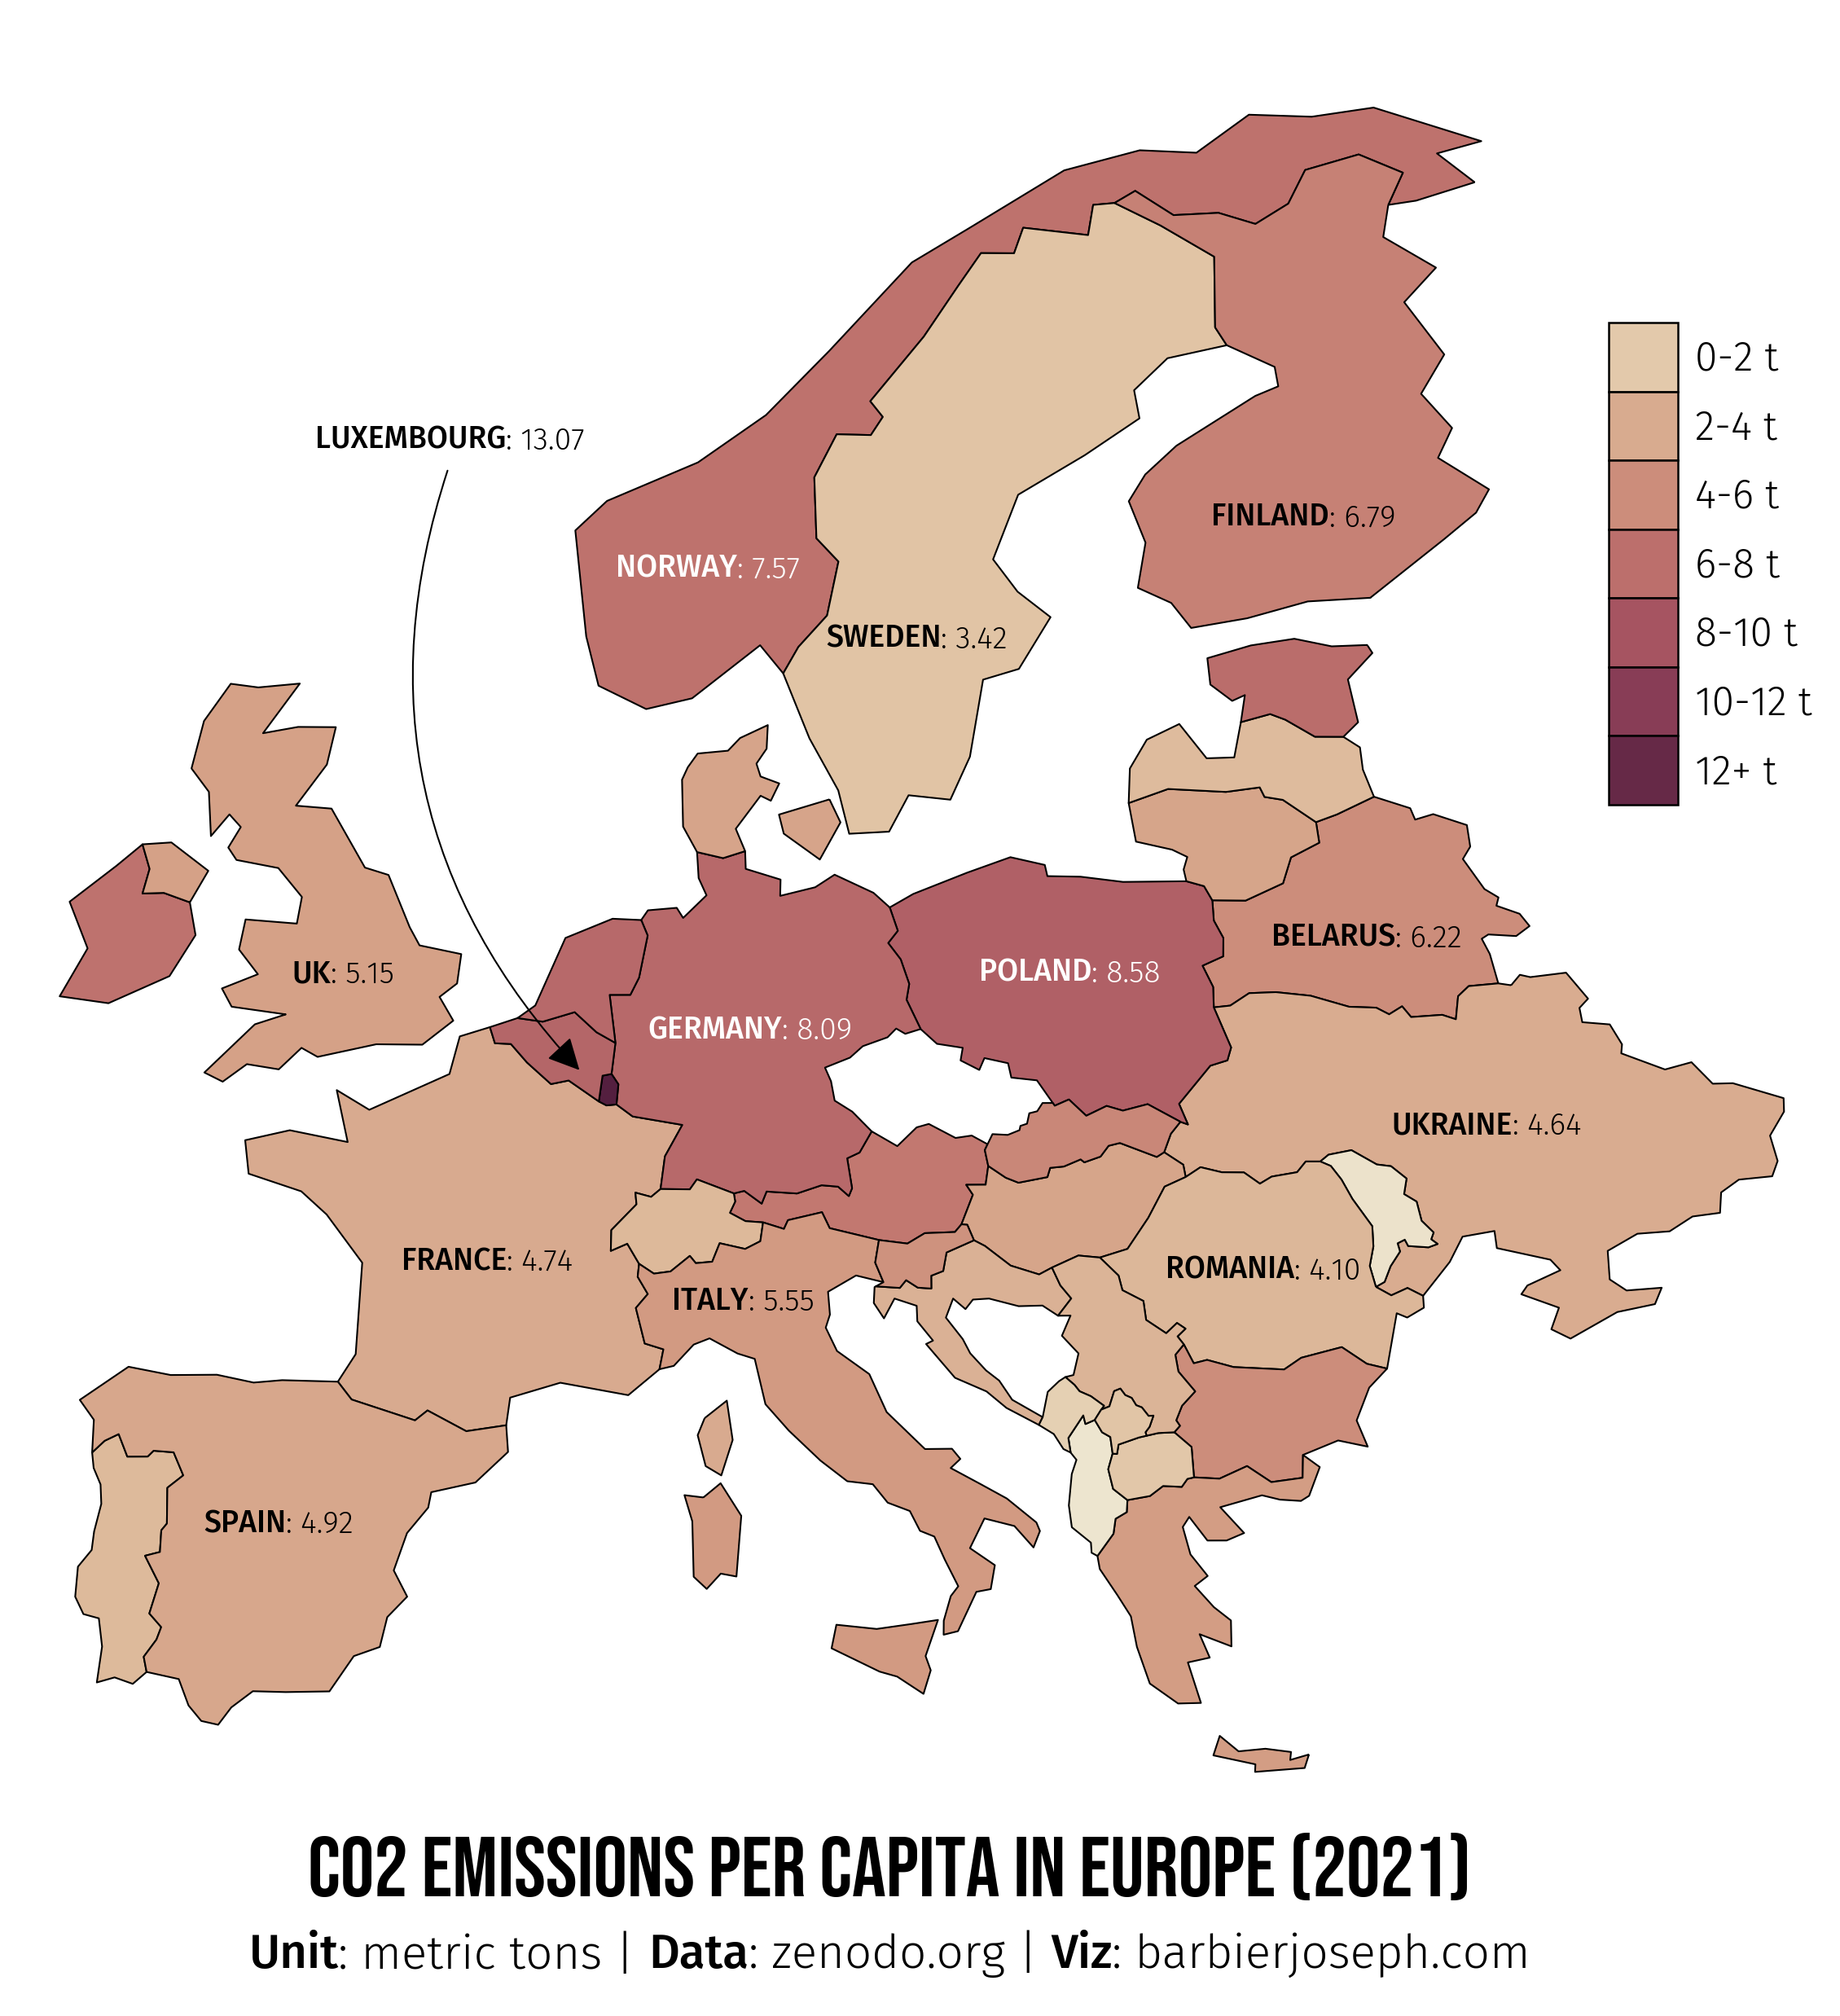

In [10]:
# load the colormap
cmap = load_cmap('BrwnYl', cmap_type='continuous')
background_color = 'white'
text_color = 'black'

value_ranges = [1, 3, 5, 7, 9, 11, 13, 15]
labels = ['0-2 t', '2-4 t', '4-6 t', '6-8 t', '8-10 t', '10-12 t', '12+ t']

# load the font
font = load_font(
   'https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2018)ByDhamraType/ttf/BebasNeue-Regular.ttf?raw=true'
)
other_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Light.ttf?raw=true'
)
other_bold_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Medium.ttf?raw=true'
)

# arrow properties
arrow_props = dict(width=0.5, head_width=4, head_length=8, color='black')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# define range and values for the legend
value_ranges = [1, 3, 5, 7, 9, 11, 13, 15]
labels = ['0-2 t', '2-4 t', '4-6 t', '6-8 t', '8-10 t', '10-12 t', '12+ t']

# parameters of the legend
rectangle_width = 2
rectangle_height = 1.5
legend_x = 35
legend_y_start = 65
legend_y_step = 1.5

# create the legend
for i in range(len(labels)):
   value = (value_ranges[i] + value_ranges[i + 1]) / 2 / value_ranges[-1]  # Normalize the value to [0, 1]
   color = cmap(value)
   ax.add_patch(plt.Rectangle((legend_x, legend_y_start - i * legend_y_step), rectangle_width, rectangle_height,
                              color=color, ec='black', lw=0.6))
   ax.text(legend_x + 2.5, legend_y_start - i * legend_y_step + 0.7, labels[i],
         fontsize=12, fontproperties=other_font, color=text_color, va='center')

# compute centroids and display the total
adjustments = {
   'France': (10, 3),
   'Italy': (-2.4, 2.5),
   'Finland': (0, -2),
   'Belarus': (0, -0.4),
   'Ireland': (0, -1),
   'Germany': (-0.2, 0),
   'Poland': (0, 0.2),
   'Sweden': (-1.2, -2.8),
   'United Kingdom': (1, -1.5),
   'Norway': (-4, -5.5),
}
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
countries_to_annotate = data['name'].tolist()
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine',
   'Spain', 'Germany',
   'Sweden', 'United Kingdom',
   'Belarus', 'Norway'
]
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

# title
fig_text(
   s="CO2 emissions per capita in Europe (2021)", x=0.5, y=0.14,
   color=text_color, fontsize=25, font=font, ha='center', va='top', ax=ax
)

# subtitle
fig_text(
   s="<Unit>: metric tons | <Data>: zenodo.org | <Viz>: barbierjoseph.com", x=0.5, y=0.1,
   color=text_color, fontsize=14, font=other_font, ha='center', va='top', ax=ax,
   highlight_textprops=[{'font': other_bold_font}, {'font': other_bold_font}, {'font': other_bold_font}]
)

# arrows for the Luxembourg
luxembourg_values = data.loc[data['name'] == 'Luxembourg', 'Total'].values[0]
fig_arrow(tail_position=(0.32, 0.7), head_position=(0.375, 0.45), radius=0.3, **arrow_props)
fig_text(
   s=f"<LUXEMBOURG>: {luxembourg_values:.2f}", x=0.32, y=0.71, highlight_textprops=[{'font': other_bold_font}],
   color=text_color, fontsize=9, font=other_font, ha='center', va='center', fig=fig
)

# display the plot
plt.savefig('../../static/graph/web-map-with-custom-legend.png', dpi=300)
plt.show()

## Going further

You might be interested in:

- [multiple choropleth maps on the same figure](/web-multiple-maps)
- how to create great [legends for categorical data](/585-legend-for-categorical-data-matplotlib)
- how to create a [tile map with matplotlib](/web-stacked-area-charts-on-a-map)
